In [1]:
import matplotlib.pyplot as plt
import numpy as np

import optical_gating_analysis as OG
from tqdm import tqdm


from scipy.stats import gaussian_kde

In [9]:
import matplotlib

matplotlib.rcParams.update(
    {
        # Adjust to your LaTex-Engine
        "pgf.texsystem": "xelatex",
        "font.family": "serif",
        "text.usetex": True,
        "pgf.rcfonts": False,
        "axes.unicode_minus": False,
    }
)

matplotlib.rcParams['figure.figsize'] = (8, 6)

In [32]:
oog_default = OG.BasicOpticalGating().default()
oog_default.settings["pi_space"] = False
oog_default.run()

np.savetxt("2012-06-20 13.34.11 vid 2x2 multi phase single plane phases frame_space.txt", oog_default.phases)
np.savetxt("2012-06-20 13.34.11 vid 2x2 multi phase single plane delta_phases frame_space.txt", oog_default.delta_phases)

oog_default = OG.BasicOpticalGating().default()
oog_default.run()

np.savetxt("2012-06-20 13.34.11 vid 2x2 multi phase single plane phases phase_space.txt", oog_default.phases)
np.savetxt("2012-06-20 13.34.11 vid 2x2 multi phase single plane delta_phases phase_space.txt", oog_default.delta_phases)

Setting source to D:\Data\2012-06-20 13.34.11 vid 2x2 multi phase single plane\brightfield\*tif
Loading reference sequence from D:\Data\2012-06-20 13.34.11 vid 2x2 multi phase single plane\ref_seq.tif


Getting phases: 100%|██████████| 1106/1106 [00:00<00:00, 155136.79it/s]


Setting source to D:\Data\2012-06-20 13.34.11 vid 2x2 multi phase single plane\brightfield\*tif
Loading reference sequence from D:\Data\2012-06-20 13.34.11 vid 2x2 multi phase single plane\ref_seq.tif


Getting phases: 100%|██████████| 1106/1106 [00:00<00:00, 109135.19it/s]


In [37]:
oog = OG.BasicOpticalGating()
oog.sequence_manager.set_source(r"E:\data\my data\Arrhythmic imaging April 2024 2\2024-04-26 17.30.44 vid bloodless 200fps\Allied Vision Technologies GS650 0001f61c\*tif")
oog.sequence_manager.set_reference_sequence(r"E:\data\my data\Arrhythmic imaging April 2024 2\2024-04-26 17.30.44 vid bloodless 200fps\ref-frames-2024-04-26-17.29.51\*tif")
oog.sequence_manager.reference_period = 73.106274
oog.settings["pi_space"] = False
oog.run()

np.savetxt("\2024-04-26 17.30.44 vid bloodless 200fps phases frame_space", oog.phases)
np.savetxt("2024-04-26 17.30.44 vid bloodless 200fps delta_phases frame_space", oog.delta_phases)


oog = OG.BasicOpticalGating()
oog.sequence_manager.set_source(r"E:\data\my data\Arrhythmic imaging April 2024 2\2024-04-26 17.30.44 vid bloodless 200fps\Allied Vision Technologies GS650 0001f61c\*tif")
oog.sequence_manager.set_reference_sequence(r"E:\data\my data\Arrhythmic imaging April 2024 2\2024-04-26 17.30.44 vid bloodless 200fps\ref-frames-2024-04-26-17.29.51\*tif")
oog.sequence_manager.reference_period = 73.106274
oog.run()

np.savetxt("2024-04-26 17.30.44 vid bloodless 200fps phases phase_space", oog.phases)
np.savetxt("2024-04-26 17.30.44 vid bloodless 200fps delta_phases phase_space", oog.delta_phases)

Setting source to E:\data\my data\Arrhythmic imaging April 2024 2\2024-04-26 17.30.44 vid bloodless 200fps\Allied Vision Technologies GS650 0001f61c\*tif
Loading reference sequence from E:\data\my data\Arrhythmic imaging April 2024 2\2024-04-26 17.30.44 vid bloodless 200fps\ref-frames-2024-04-26-17.29.51\*tif


Getting phases: 100%|██████████| 37970/37970 [00:00<00:00, 177386.83it/s]


Setting source to E:\data\my data\Arrhythmic imaging April 2024 2\2024-04-26 17.30.44 vid bloodless 200fps\Allied Vision Technologies GS650 0001f61c\*tif
Loading reference sequence from E:\data\my data\Arrhythmic imaging April 2024 2\2024-04-26 17.30.44 vid bloodless 200fps\ref-frames-2024-04-26-17.29.51\*tif


Getting phases: 100%|██████████| 37970/37970 [00:00<00:00, 140599.84it/s]


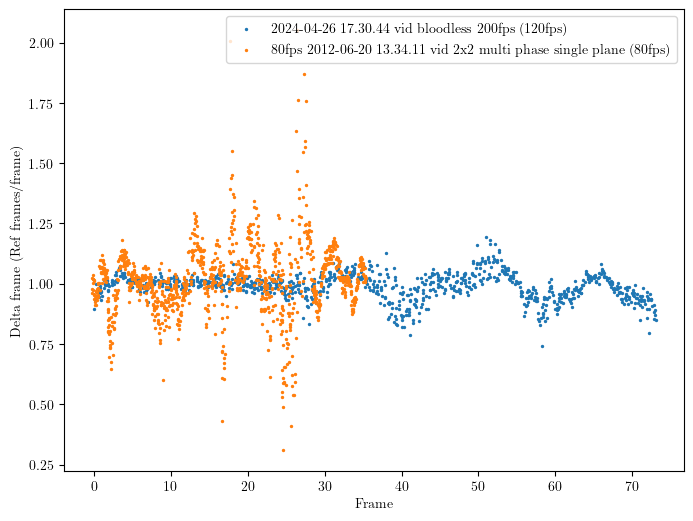

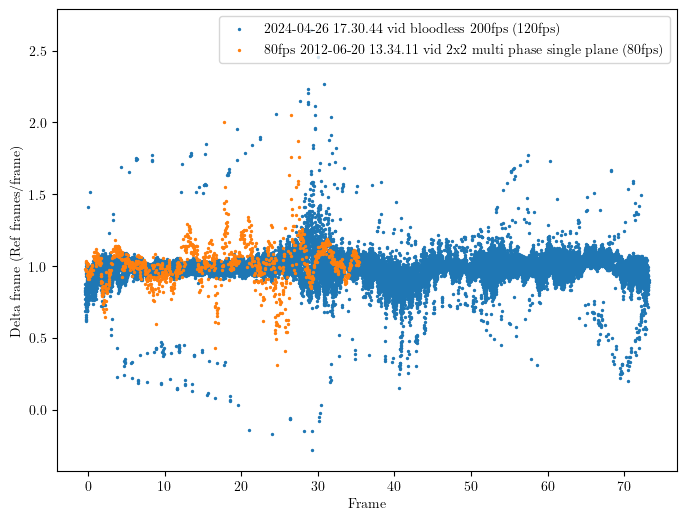

In [14]:
plt.scatter(oog.phases[2000:3000], oog.delta_phases[2000:3000], s = 2, label = "2024-04-26 17.30.44 vid bloodless 200fps (120fps)")
plt.scatter(oog_default.phases[1::], oog_default.delta_phases, s = 2, label = "80fps 2012-06-20 13.34.11 vid 2x2 multi phase single plane (80fps)")
plt.xlabel("Frame")
plt.ylabel("Delta frame (Ref frames/frame)")
plt.legend()
plt.show()

plt.scatter(oog.phases[1::], oog.delta_phases, s = 2, label = "2024-04-26 17.30.44 vid bloodless 200fps (120fps)")
plt.scatter(oog_default.phases[1::], oog_default.delta_phases, s = 2, label = "80fps 2012-06-20 13.34.11 vid 2x2 multi phase single plane (80fps)")
plt.xlabel("Frame")
plt.ylabel("Delta frame (Ref frames/frame)")
plt.legend()
plt.show()

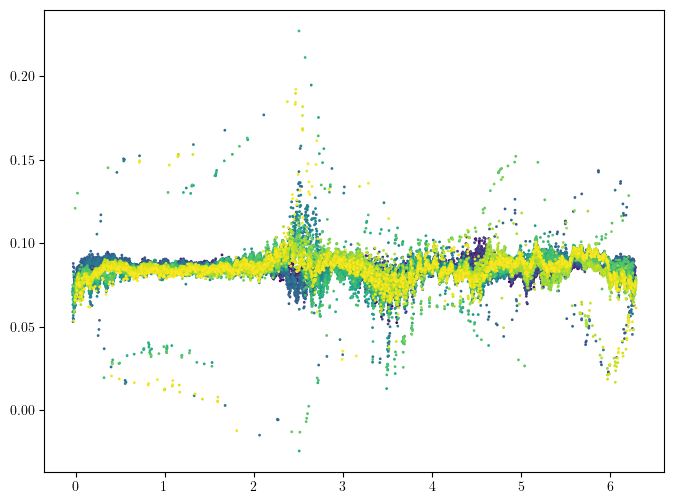

In [36]:
plt.scatter(oog.phases[1::], oog.delta_phases, c = range(len(oog.phases[1::])), s = 1)
plt.show()

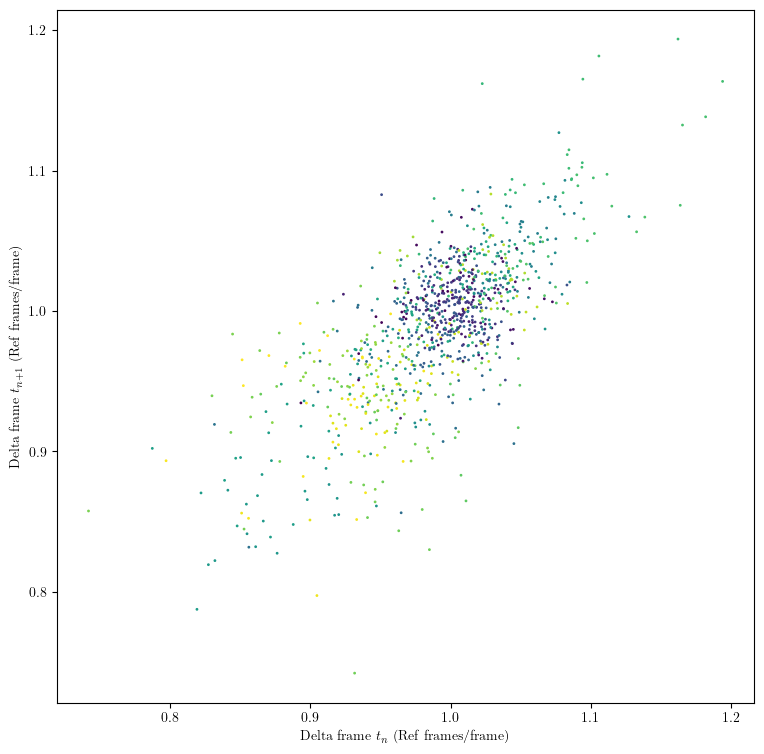

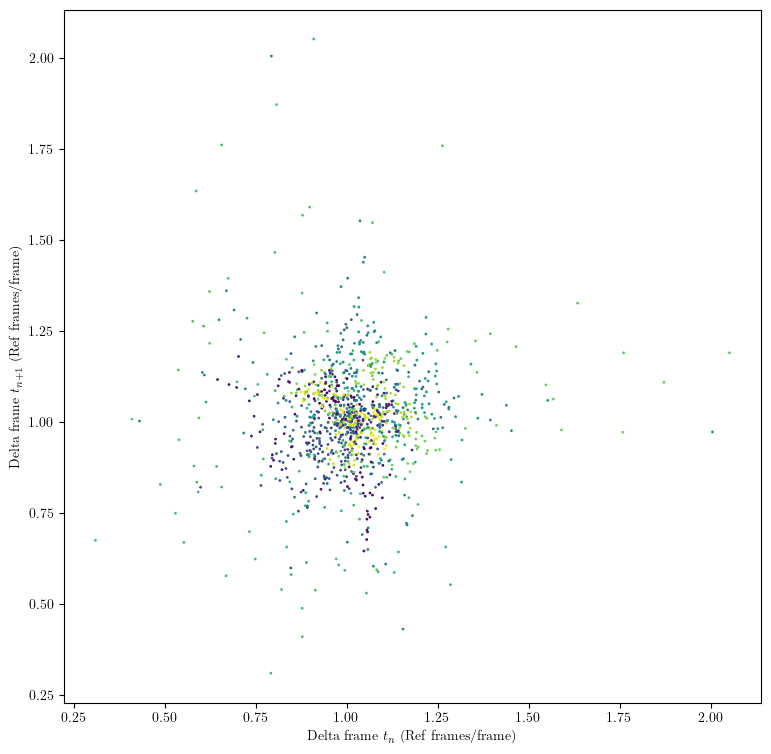

In [25]:
plt.figure(figsize = (9,9))
plt.scatter(oog.delta_phases[2000:3000], oog.delta_phases[2001:3001], s = 1, c = oog.phases[2000:3000])
plt.xlabel("Delta frame $t_n$ (Ref frames/frame)")
plt.ylabel("Delta frame $t_{n+1}$ (Ref frames/frame)")
plt.axis("equal")
plt.show()

plt.figure(figsize = (9,9))
plt.scatter(oog_default.delta_phases[0:-1], oog_default.delta_phases[1::], s = 1, c = oog_default.phases[1:-1])
plt.xlabel("Delta frame $t_n$ (Ref frames/frame)")
plt.ylabel("Delta frame $t_{n+1}$ (Ref frames/frame)")
plt.axis("equal")
plt.show()

In [38]:
oog = OG.BasicOpticalGating()
oog.sequence_manager.set_source(r"E:\data\my data\Arrhythmic imaging April 2024 2\very_good_sync_proprananol\Allied Vision Technologies GS650 0001f61c\*tif")
oog.sequence_manager.set_reference_sequence(r"E:\data\my data\Arrhythmic imaging April 2024 2\very_good_sync_proprananol\ref-frames-2024-04-25-12.34.41\*tif")
oog.sequence_manager.reference_period = 110.514686
oog.settings["pi_space"] = False
oog.run()

np.savetxt("very_good_sync_proprananol phases frame_space.txt", oog.phases)
np.savetxt("very_good_sync_proprananol delta_phases frame_space.txt", oog.delta_phases)


oog = OG.BasicOpticalGating()
oog.sequence_manager.set_source(r"E:\data\my data\Arrhythmic imaging April 2024 2\very_good_sync_proprananol\Allied Vision Technologies GS650 0001f61c\*tif")
oog.sequence_manager.set_reference_sequence(r"E:\data\my data\Arrhythmic imaging April 2024 2\very_good_sync_proprananol\ref-frames-2024-04-25-12.34.41\*tif")
oog.sequence_manager.reference_period = 110.514686  
oog.run()

np.savetxt("very_good_sync_proprananol phases phase_space.txt", oog.phases)
np.savetxt("very_good_sync_proprananol delta_phases phase_space.txt", oog.delta_phases)

Setting source to E:\data\my data\Arrhythmic imaging April 2024 2\very_good_sync_proprananol\Allied Vision Technologies GS650 0001f61c\*tif
Loading reference sequence from E:\data\my data\Arrhythmic imaging April 2024 2\very_good_sync_proprananol\ref-frames-2024-04-25-12.34.41\*tif


Getting phases: 100%|██████████| 6541/6541 [00:00<00:00, 191397.67it/s]


Setting source to E:\data\my data\Arrhythmic imaging April 2024 2\very_good_sync_proprananol\Allied Vision Technologies GS650 0001f61c\*tif
Loading reference sequence from E:\data\my data\Arrhythmic imaging April 2024 2\very_good_sync_proprananol\ref-frames-2024-04-25-12.34.41\*tif


Getting phases: 100%|██████████| 6541/6541 [00:00<00:00, 173274.78it/s]


In [ ]:
_